# Problem Statement

You work for a **consumer finance company** which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. **Two types of risks** are associated with the bank’s decision:
 - If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business to the company**.
 - If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss for the company**.

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

 1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
       - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
       - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.    These candidates are not labelled as 'defaulted'.
       - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

 2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 

# Data Sourcing

In [2]:
#Impoting the required modules
import numpy as np
import pandas as pd

#Data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Reading the csv file
loan_data = pd.read_csv('loan.csv')

In [14]:
#Displaying the header rows
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
#Displaying the lower rows
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Displaying the shape
loan_data.shape

(39717, 111)

In [17]:
#Displaying the info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [18]:
#Displaying the describe
loan_data.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [19]:
#Displaying the datatypes
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Cleaning

In [20]:
#Finding the null/missing values
null_values = (round(loan_data.isnull().mean())*100, 2)
null_values

(id                              0.0
 member_id                       0.0
 loan_amnt                       0.0
 funded_amnt                     0.0
 funded_amnt_inv                 0.0
                               ...  
 tax_liens                       0.0
 tot_hi_cred_lim               100.0
 total_bal_ex_mort             100.0
 total_bc_limit                100.0
 total_il_high_credit_limit    100.0
 Length: 111, dtype: float64,
 2)

**Observation**: There are many columns with null/missing values. These columns must be removed from the data.

In [21]:
#Removing the columns
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Observation**: There are many columns with single values. They cannot contribute in the analysis so these should be removed.

In [22]:
#Listing the columns of single values and removing them
single_values = ['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt']
loan_data.drop(single_values, axis = 1, inplace = True)

In [23]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which some correspond to the post approval of loan

- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.

#### List of columns not necessary for our analysis

- **"id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc".** 
- **"out_prncp_inv" , "total_pymnt_inv "** are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- **"funded_amnt"** is not needed because we only need info as to how much is funded in actual. As we have **"funded_amnt_inv"** , we can remove the earlier column.

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [24]:
#Listing the above mentioned 27 unnecesary columns
unnecessary_cols = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc",
                   "out_prncp_inv", "funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", 
                    "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "next_pymnt_d", "last_pymnt_amnt",
                    "collection_recovery_fee", "last_pymnt_d", "chargeoff_within_12_mths",  "mths_since_last_delinq", 
                    "mths_since_last_record"]
loan_data.drop(unnecessary_cols, axis = 1, inplace = True)

In [25]:
#Displaying the header rows after the data cleaning
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,5833.84
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,1008.71
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,3005.67
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,12231.89
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,17.94,Jan-96,0,15,0,53.90%,38,3513.33


In [26]:
#Displaying the columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_pymnt_inv'],
      dtype='object')

In [27]:
#'total_payment_inv' column is also an unnecessary column. So removing that column
loan_data.drop('total_pymnt_inv', axis = 1, inplace = True)

In [28]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

## Conclusion:

 - The columns having null/missing values are removed.
 - The unnecessary columns having data which does not contribute in our analysis are also removed.

The **Data Sourcing and Data Cleaning** are completed.

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.

- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status.

In [29]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [30]:
#Checking for missing values again
miss_values = round((loan_data.isnull().mean())*100, 2)
miss_values

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
dtype: float64

**"emp_length", "revol_util"** columns have more missing values. First lets check the datatype in those columns.

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

In [32]:
#Printing the mode value of the "emp_length" column
print("Mode: " + loan_data.emp_length.mode())
loan_data.emp_length.value_counts()

0    Mode: 10+ years
Name: emp_length, dtype: object


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

## Observation:
 - The mode value has high frequency than that of next frequent value so we can assign the mode values to the null values in the column.
 - Imputing the mode values in the column does not affect the analysis because the missing values percentage is very low.

In [33]:
#Imputing the missing values in "emp_length" column
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
miss_values = loan_data.emp_length.isnull().sum()
miss_values

0

In [34]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

## Standardizing the data 

- "revol_util" column although described as an object column, it has continous values. 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable. 

In [35]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [36]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [37]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [38]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Outlier Treatment

 - Checking the outliers with the box plot

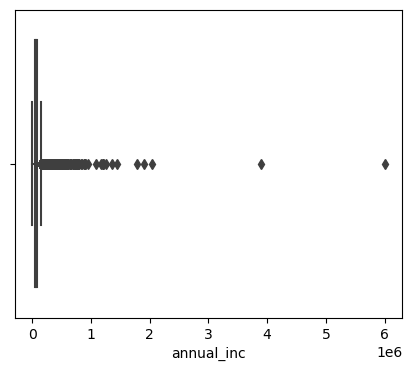

In [39]:
#Box plot for "annual_inc" column
plt.figure(figsize=(5,4))
sns.boxplot(x = loan_data['annual_inc'])
plt.show()

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [40]:
#Quantile info 
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [41]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

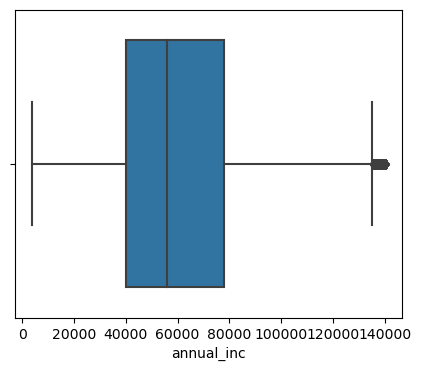

In [42]:
plt.figure(figsize=(5,4))
sns.boxplot(x = loan_data.annual_inc)
plt.show()

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

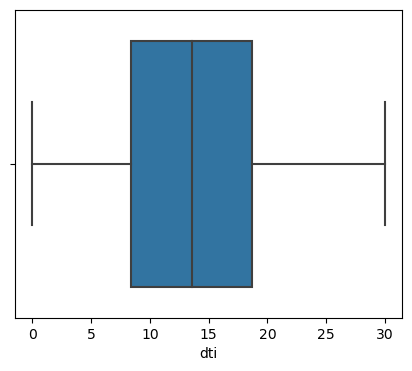

In [43]:
#Box plot of "dti" column
plt.figure(figsize=(5,4))
sns.boxplot(x = loan_data.dti)
plt.show()

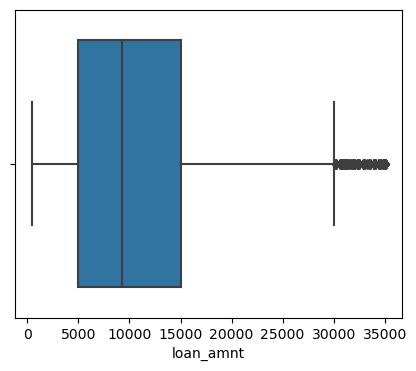

In [44]:
#Box plot for "loan_amnt" column
plt.figure(figsize=(5,4)) 
sns.boxplot(x = loan_data.loan_amnt)
plt.show()

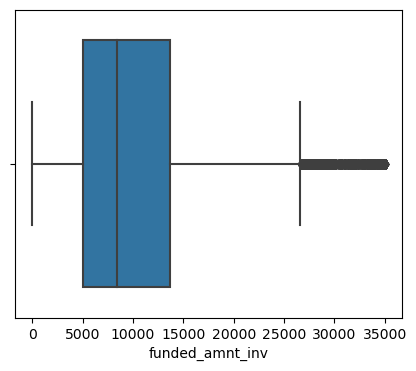

In [45]:
#Box plot for "funded_amnt_inv" column
plt.figure(figsize=(5,4))
sns.boxplot(x = loan_data.funded_amnt_inv)
plt.show()

In [46]:
#Quantiles for loan amount
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [47]:
#Quantiles for funded_amnt_inv
loan_data.funded_amnt_inv.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

# Visualising the Categorical Data

### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for **'Charged Off'** loan_status for below plots


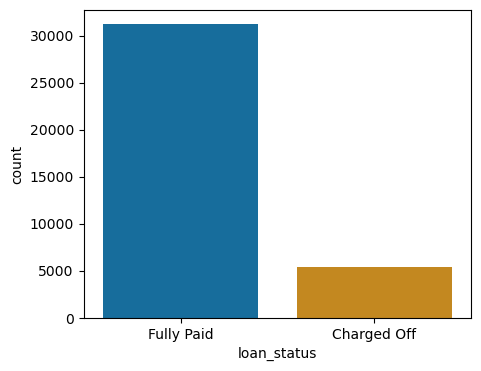

In [93]:
#Countour plot for "loan_status"
plt.figure(figsize=(5,4))
sns.countplot(x = 'loan_status', data = loan_data)
plt.show()

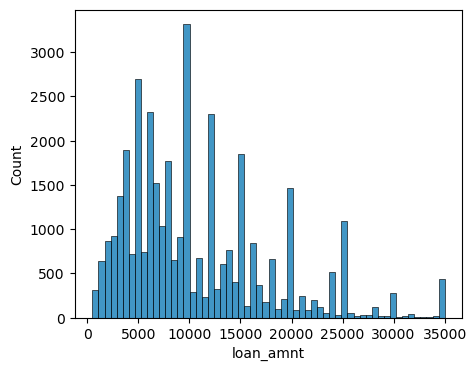

In [101]:
plt.figure(figsize=(5,4))
sns.histplot(x = 'loan_amnt', data = loan_data)
plt.show()

In [49]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

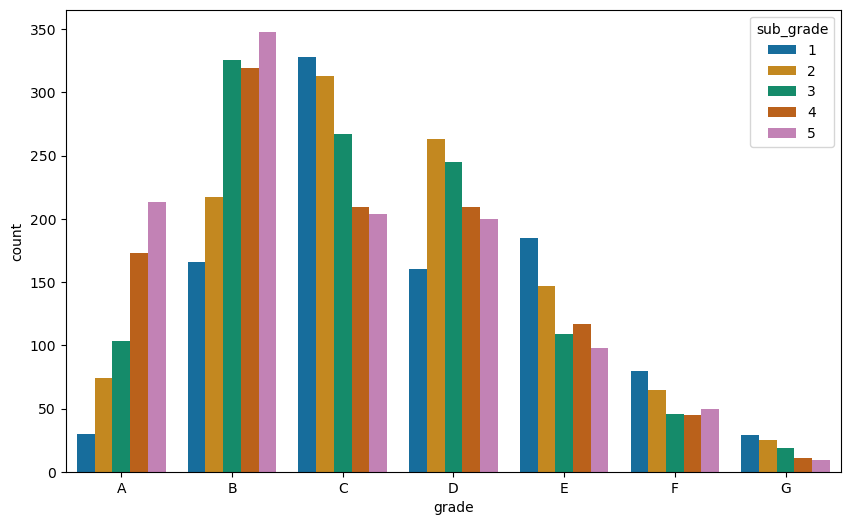

In [50]:
#Countour plot showing grade and sub-grade
fig, ax = plt.subplots(figsize=(10,6))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , 
              hue = 'sub_grade', data = loan_data[loan_data.loan_status == 'Charged Off'])

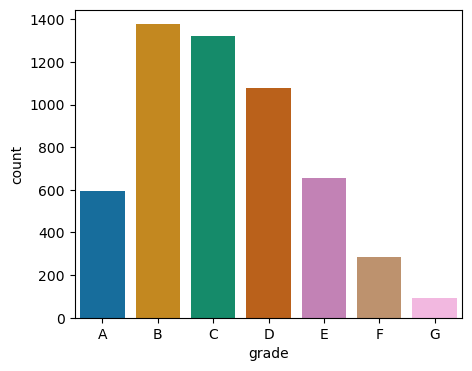

In [51]:
#Showing the countour plot for grades
plt.figure(figsize=(5,4))
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], 
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

### Analysing the home_ownership

In [52]:
#Checking the unique values in this column
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [53]:
#Replacing the values of NONE
loan_data['home_ownership'].replace(to_replace = ['NONE'], value = 'OTHER', inplace = True)

In [54]:
#Again checking the values
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

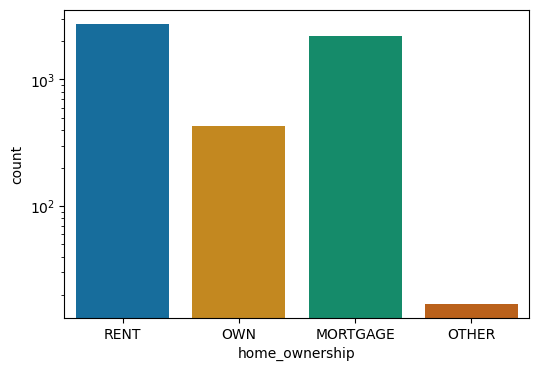

In [55]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Analysing "purpose" column

<Axes: xlabel='count', ylabel='purpose'>

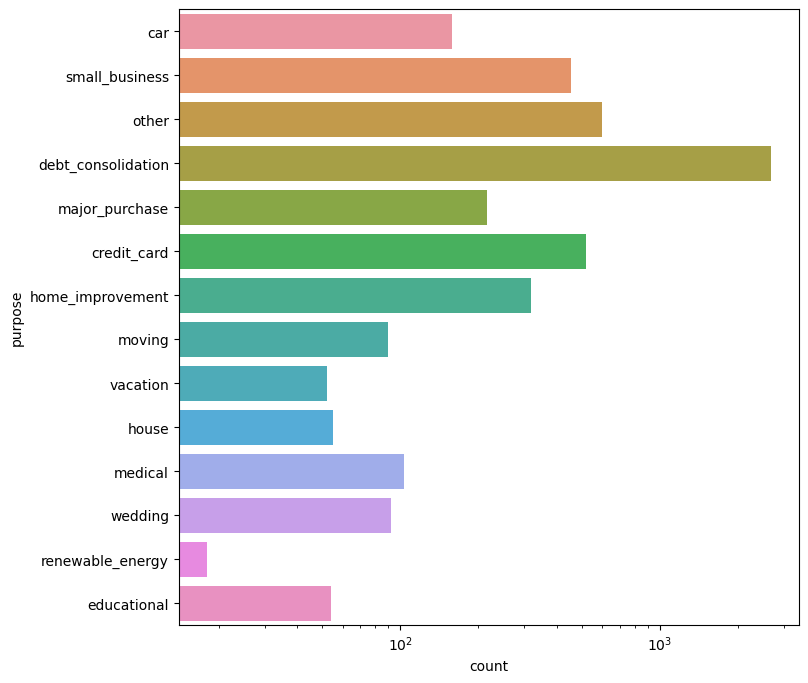

In [92]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


#### Creating bins for some numerical variable to make them categorical

In [57]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,
                                      labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,
                                      labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,
                                        labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,
                                       labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,
                                        labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [58]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rate with respect to the interest rate bins created

<Axes: xlabel='emp_length', ylabel='count'>

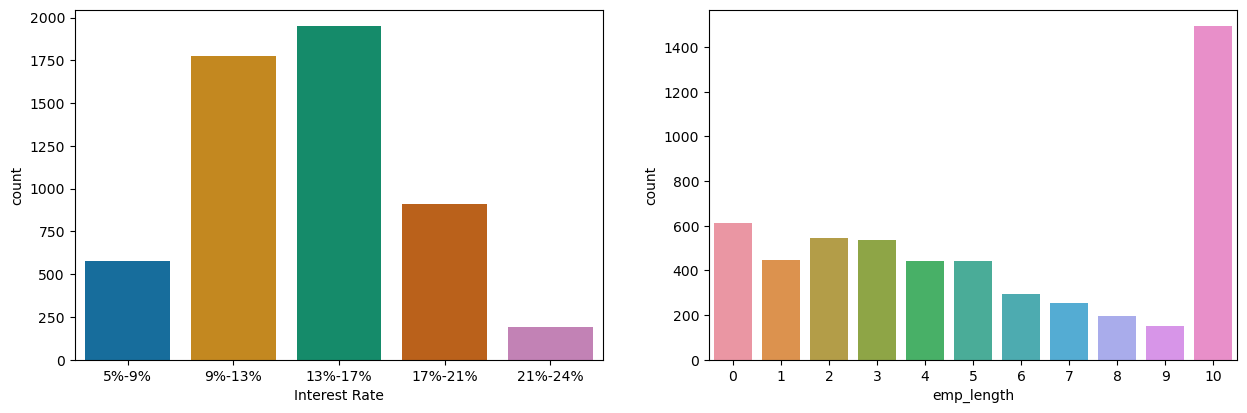

In [59]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

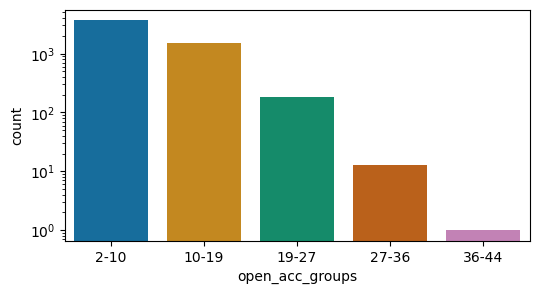

In [62]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

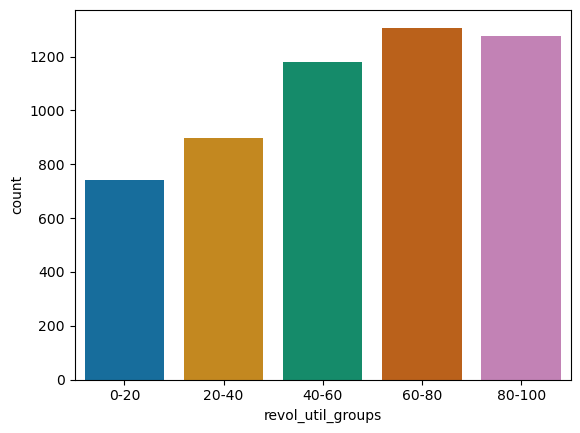

In [63]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

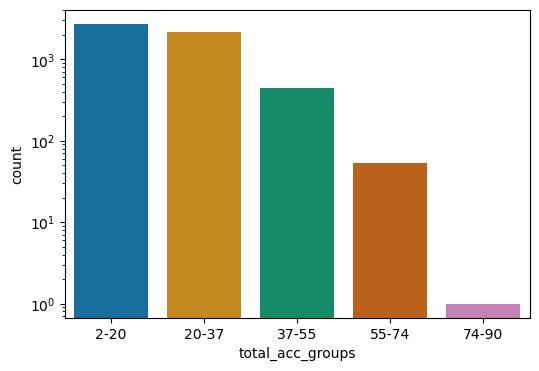

In [64]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

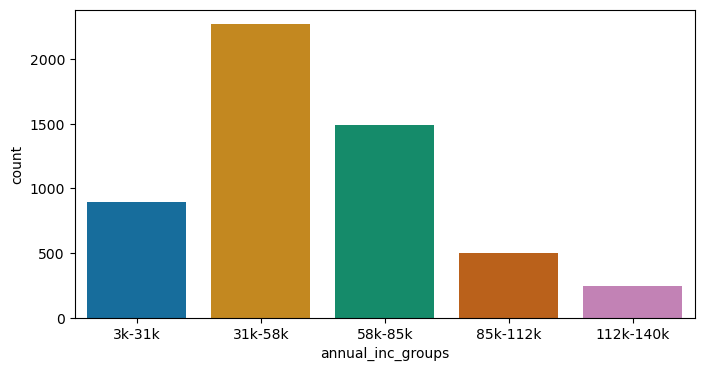

In [65]:
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

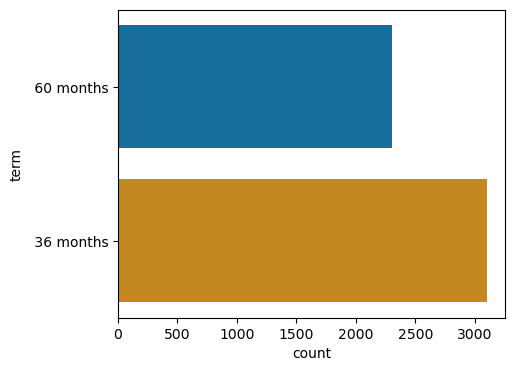

In [66]:
#Analysing 'term' column
plt.figure(figsize=(5,4))
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#Analysing 'verification status' column
plt.figure(figsize=(5,4))
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

<Axes: xlabel='inq_last_6mths', ylabel='count'>

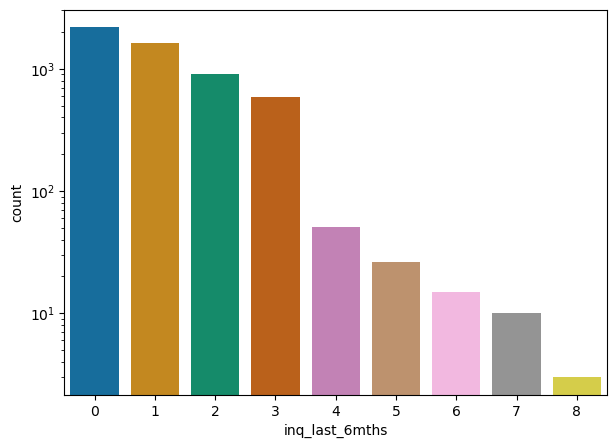

In [67]:
#Analysing 'inq_last_6mnths' column
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Analysing by issued month and year

In [68]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [69]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

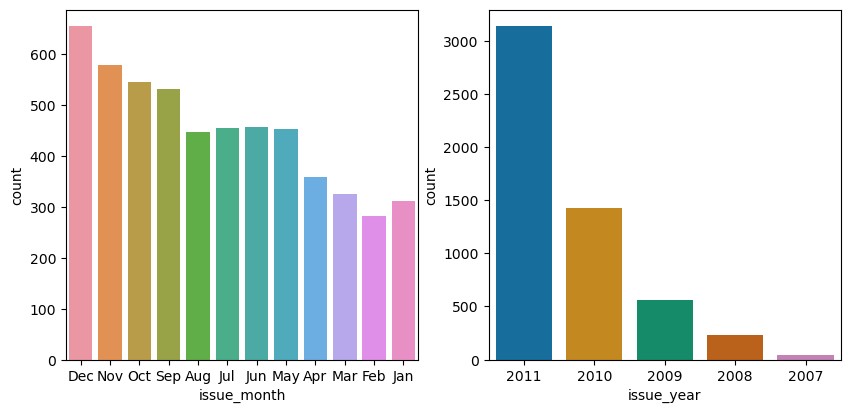

In [70]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Observation:

It is observed that **maximum number of defaults** occured when the loan was sanctioned/issued in **Dec**. Loan issued in the year **2011** were also as compared to other years

### Analyzing installment,dti, loan_amnt 

In [71]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,
                                         labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,
                                            labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,
                                       labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [72]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,2-10,0-20,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,2-10,20-40,20-37,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,2-10,20-40,2-20,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

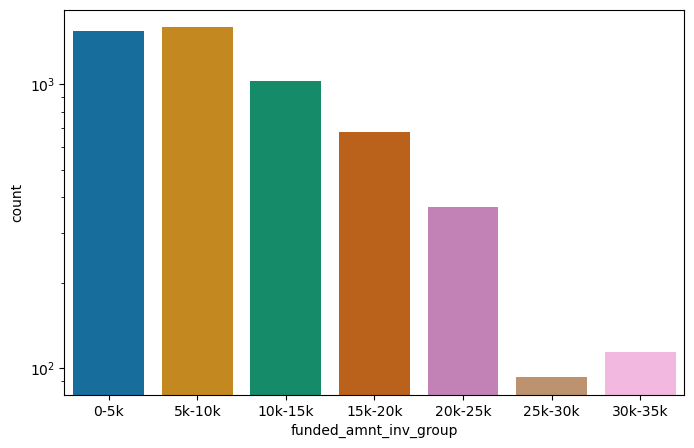

In [73]:
fig,ax = plt.subplots(figsize = (8,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

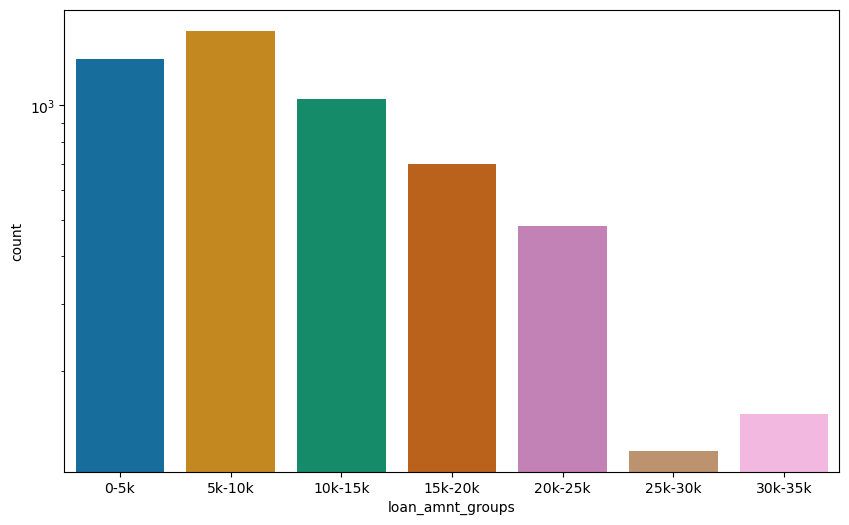

In [74]:
fig,ax = plt.subplots(figsize = (10,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

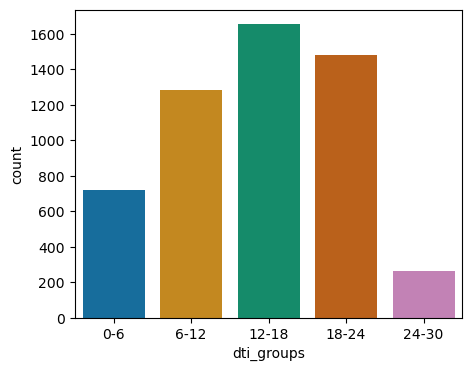

In [75]:
#Analysing 'dti groups' column
plt.figure(figsize=(5,4))
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

<Axes: xlabel='installment_groups', ylabel='count'>

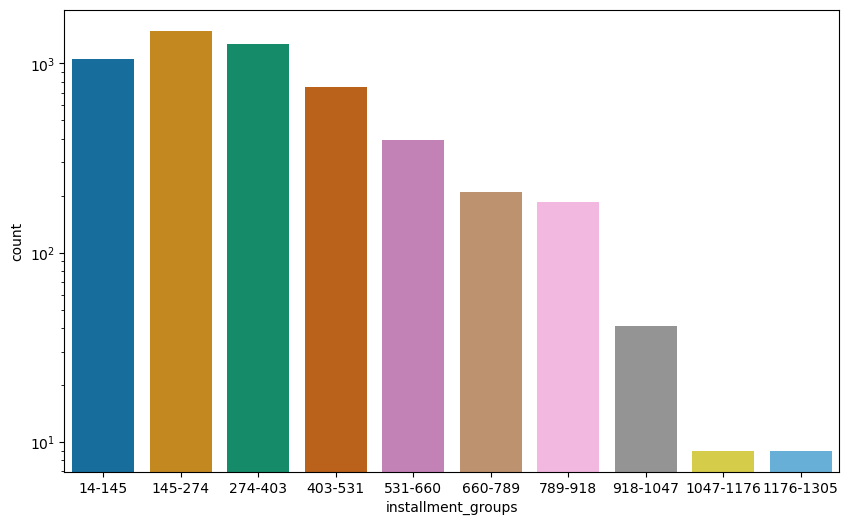

In [76]:
fig,ax = plt.subplots(figsize = (10,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

## Analysing annual income with other columns for more insights 

### 1. Annual Income VS Loan Purpose

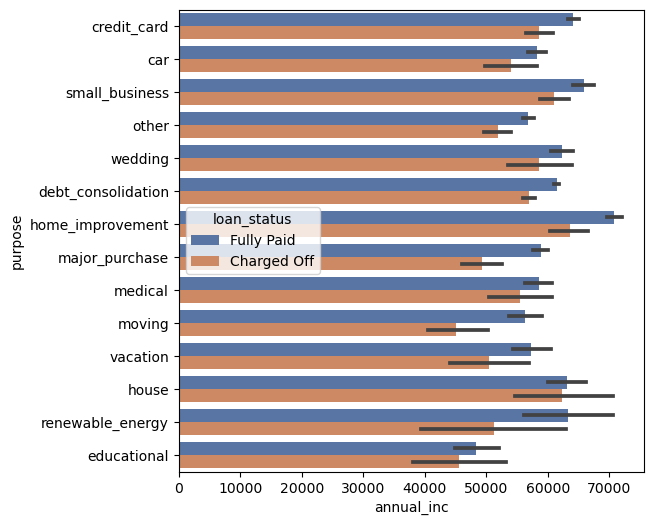

In [77]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

## Conclusions: 
 
 1. The number of loans applied and defaulted are the **highest** in number for **"debt_consolation"**, but the annual income of those who applied isn't the highest. 

 2. Applicants with **higher salary** mostly applied loans for **"home_improvment"**, **"house"**, **"renewable_energy"** and **"small_businesses"**

### 2. Annual Income VS Home Ownership

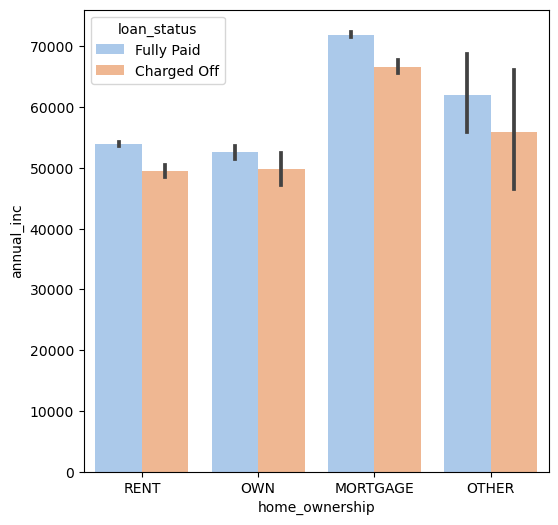

In [78]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

**Conclusion**: The applicants whose 'home_ownership' is **"Mortage"** have highest salary income.

### 3. Annual Income VS Loan Amount

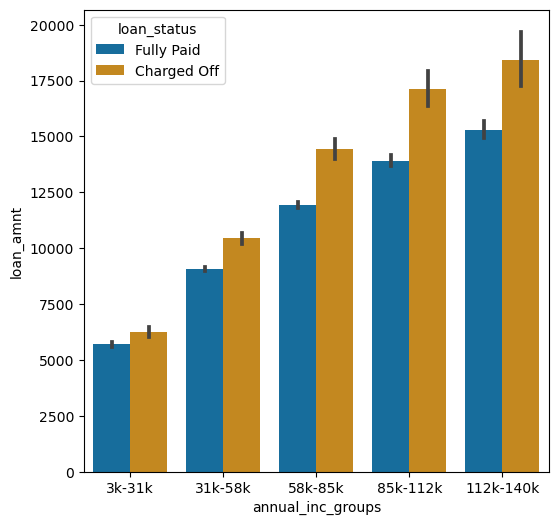

In [80]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data, x='annual_inc_groups', y='loan_amnt', hue ='loan_status')
plt.show()

**Conclusion**: The *highest* annual income group have taken the *highest* loan amount.

### 4. Annual Income VS Interest Rate

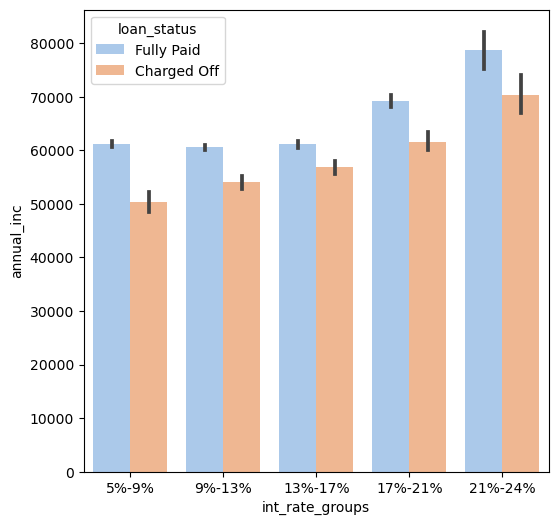

In [81]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount VS Interest Rate

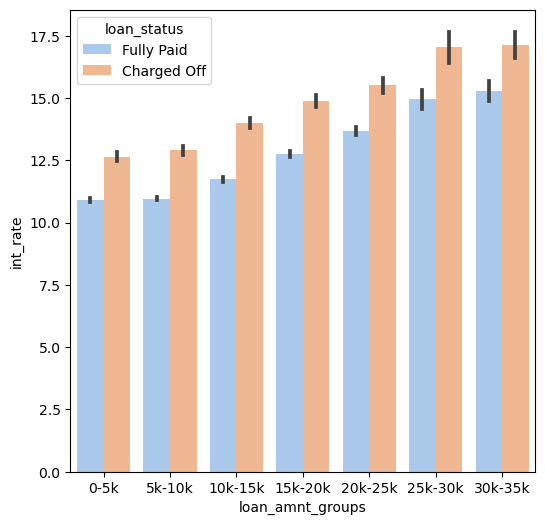

In [83]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

### 2. Loan Amount VS Loan Purpose

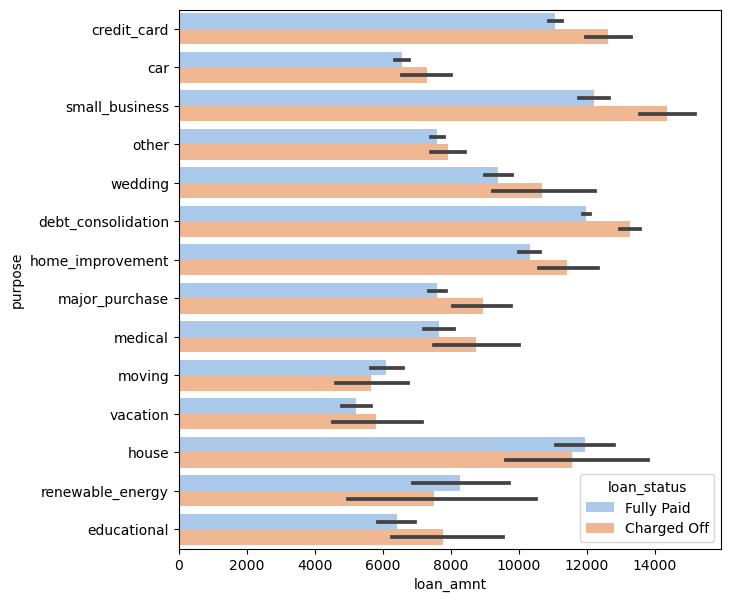

In [85]:
plt.figure(figsize=(7,7))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

### 3. Loan Amount VS Home Ownership

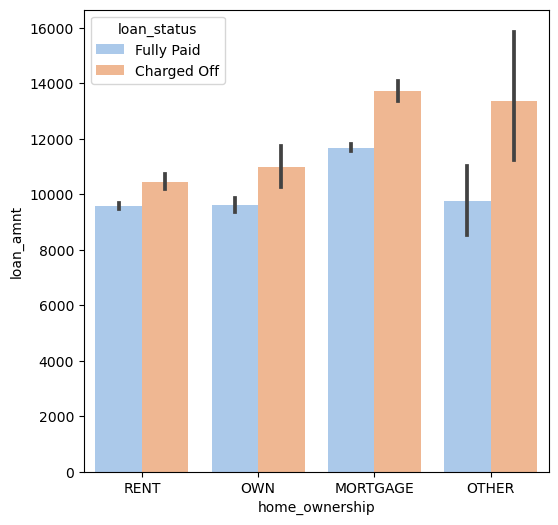

In [87]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()

### 4. Loan Amount VS Month Issued and Year Issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

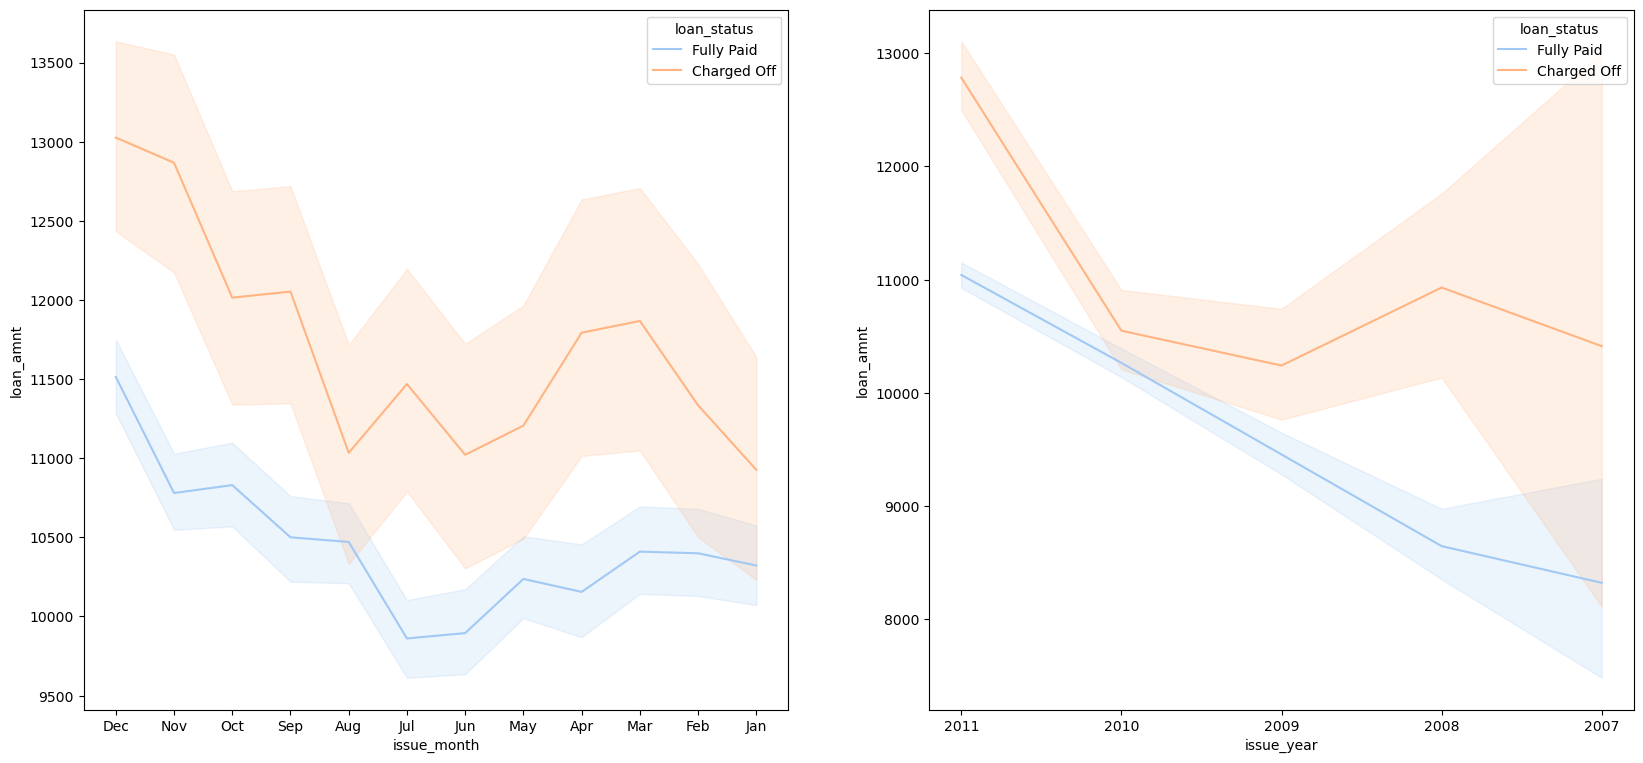

In [88]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


### 5. Loan Amount VS Grades

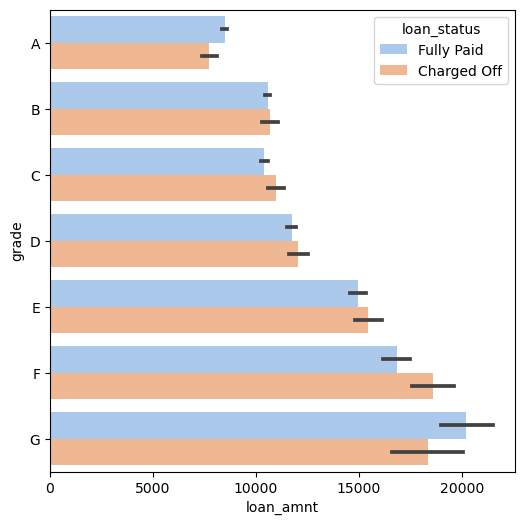

In [89]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

### 6. Loan Amount VS Emp Length and Verification Status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

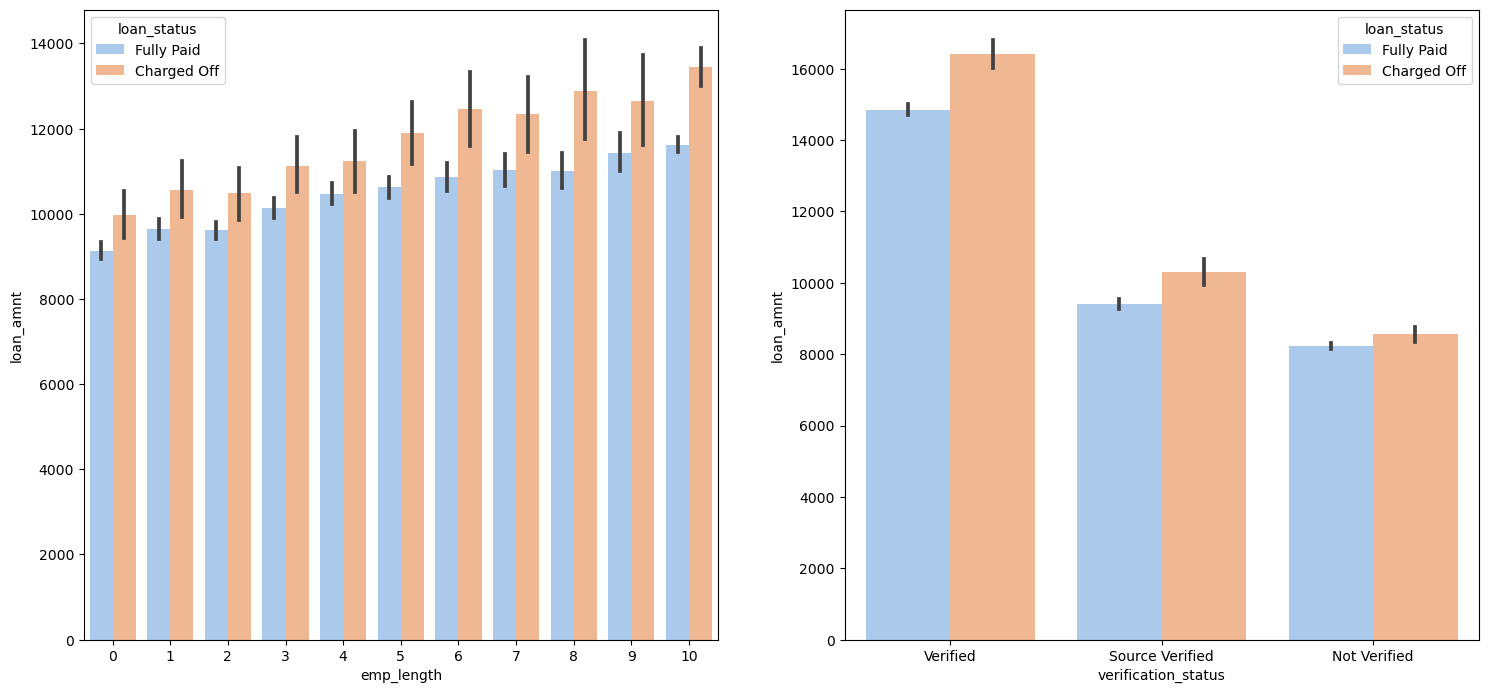

In [90]:
plt.figure(figsize=(18,18))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

## Loan Amount Groups VS Interest Rate

<Figure size 640x480 with 0 Axes>

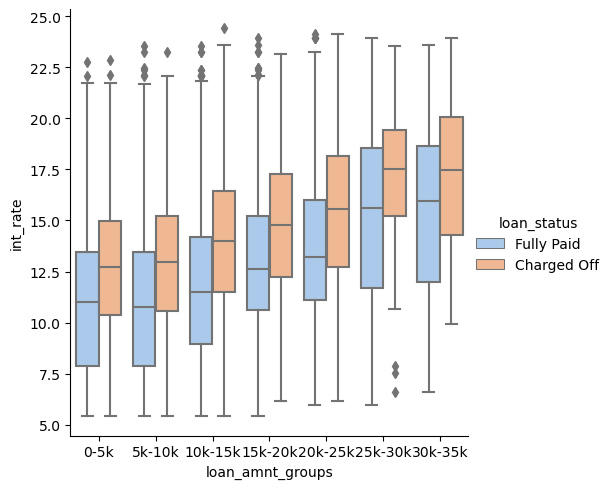

In [186]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
 - This can be a pretty **strong driving** factor effecting **loan defaulting**.

<Figure size 400x400 with 0 Axes>

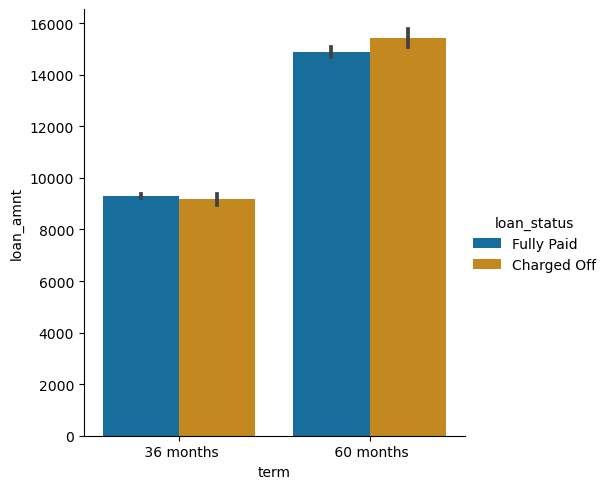

In [91]:
plt.figure(figsize=(4,4)) 
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')
plt.show()

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan. 

# Observations/ Conclusions:

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

1. Applicants taking loan for 'home improvement' and have income of 60k -70k
2. Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
3. Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
4. Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
5. Applicants who have taken a loan for small business and the loan amount is greater than 14k
6. Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
7. When grade is F and loan amount is between 15k-20k
8. When employment length is 10yrs and loan amount is 12k-14k 
9. When the loan is verified and loan amount is above 16k